# Trading Strategist Agent with BackTrader

In this demo, we introduce an agent that write trading strategy and refine it throught backtesting using the **BackTrader** library.

In [1]:
import os
import autogen
from autogen.cache import Cache

from finrobot.functional.quantitative import BackTraderUtils
from finrobot.functional.coding import IPythonUtils
from finrobot.toolkits import register_toolkits, register_code_writing
from textwrap import dedent

After importing all the necessary packages and functions, we need the config for OpenAI here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for the work_dir of coding, we use the default path defined.

In [2]:
config_list = autogen.config_list_from_json(
    "../OAI_CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4-0125-preview"],
    },
)
llm_config = {
    "config_list": config_list,
    "timeout": 120,
    # "temperature": 0 # for debug convenience
    "temperature": 0.5
}

from finrobot.functional.coding import default_path

# Intermediate strategy modules will be saved in this directory
work_dir = default_path
os.makedirs(work_dir, exist_ok=True)

For this task, we need:
- A user proxy to execute python functions and control the conversations.
- A trade strategist who writes **BackTrader** style trade strategy and can optimize them through backtesting.

In the following cell, we define the two agents, and equip them with necessary tools.

In [3]:
strategist = autogen.AssistantAgent(
    name="Trade_Strategist",
    system_message=dedent(f"""
        You are a trading strategist known for your expertise in developing sophisticated trading algorithms. 
        Your task is to leverage your coding skills to create a customized trading strategy using the BackTrader Python library, and save it as a Python module. 
        Remember to log necessary information in the strategy so that further analysis could be done.
        You can also write custom sizer / indicator and save them as modules, which would allow you to generate more sophisticated strategies.
        After creating the strategy, you may backtest it with the tool you're provided to evaluate its performance and make any necessary adjustments.
        All files you created during coding will automatically be in `{work_dir}`, no need to specify the prefix. 
        But when calling the backtest function, module path should be like `{work_dir.strip('/')}.<module_path>` and savefig path should consider `{work_dir}` as well.
        Reply TERMINATE to executer when the strategy is ready to be tested.
        """),
    llm_config=llm_config,
    
)
user_proxy = autogen.UserProxyAgent(
    name="User_Proxy",
    is_termination_msg=lambda x: x.get("content", "") and x.get("content", "").endswith("TERMINATE"),
    human_input_mode="NEVER", # change this to "ALWAYS" if you want to manually interact with the strategist
    # max_consecutive_auto_reply=10,
    code_execution_config={
        "last_n_messages": 1,
        "work_dir": work_dir,
        "use_docker": False,
    }
)
register_code_writing(strategist, user_proxy)
register_toolkits([BackTraderUtils.back_test, IPythonUtils.display_image], strategist, user_proxy)


Now it's time to see what strategy can the agent provide.

Don't expect too high as indicators are limited and the agent sees limited analysis. Let's hope we won't lose money through this.

User_Proxy (to Trade_Strategist):


Based on Microsoft's stock data from 2022-01-01 to 2024-01-01, develop a trading strategy that would performs well on this stock.
Write your own custom indicator/sizer if needed. Other backtest settings like initial cash are all up to you to decide.
After each backtest, display the saved backtest result chart, then report the current situation and your thoughts towards optimization.
Modify the code to optimize your strategy or try more different indicators / sizers into account for better performance.
Your strategy should at least outperform the benchmark strategy of buying and holding the stock.


--------------------------------------------------------------------------------
Trade_Strategist (to User_Proxy):

To approach this task effectively, I'll start by developing a basic trading strategy using the Backtrader Python library. Given Microsoft's stock (ticker symbol: MSFT) and the period from 2022-01-01 to 2024-01-01, I'll initially implement a s

[*********************100%%**********************]  1 of 1 completed


<IPython.core.display.Javascript object>

User_Proxy (to Trade_Strategist):

User_Proxy (to Trade_Strategist):

***** Response from calling tool (call_sGOrjdxDtSNabhlkroApSRFp) *****
Back Test Finished. Results: 
{ 'Drawdown': AutoOrderedDict([ ('len', 22),
                                ('drawdown', 0.0657582808035385),
                                ('moneydown', 6.647735595703125),
                                ( 'max',
                                  AutoOrderedDict([ ('len', 78),
                                                    ( 'drawdown',
                                                      0.46020451513471894),
                                                    ( 'moneydown',
                                                      46.410247802734375)]))]),
  'Final Portfolio Value': 10102.70353464828,
  'Returns': OrderedDict([ ('rtot', 0.010217971732002177),
                           ('ravg', 2.0395153157688975e-05),
                           ('rnorm', 0.0051528088861364715),
                           ('r

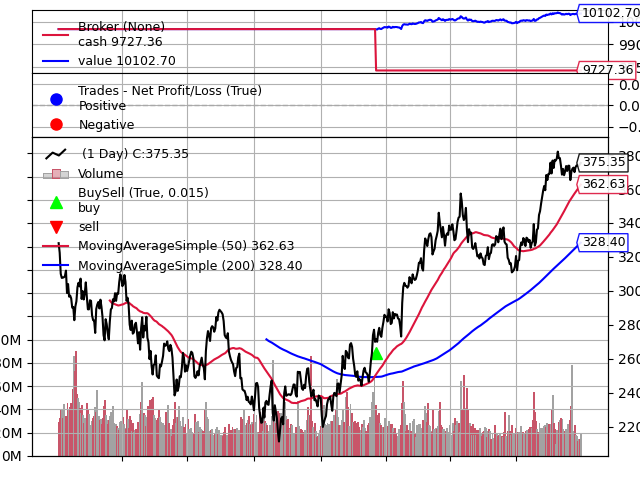

User_Proxy (to Trade_Strategist):

User_Proxy (to Trade_Strategist):

***** Response from calling tool (call_HCnt9TiqhuOwKkfF672HMISm) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Trade_Strategist (to User_Proxy):

The initial backtest of the Moving Average Crossover strategy on Microsoft's stock from 2022-01-01 to 2024-01-01 resulted in a final portfolio value of $10,102.70, starting from an initial cash position of $10,000. This represents a slight profit, but the strategy's performance is not significantly better than a simple buy and hold, especially considering the very low number of trades (only 1 trade was executed) and a negative Sharpe Ratio of -0.947, indicating poor risk-adjusted returns.

### Optimization Thoughts:

- **Adjust Moving Averages**: The initial choice of 50-day and 200-day moving averages might be too simplistic or not well-suited for Microsoft

[*********************100%%**********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

User_Proxy (to Trade_Strategist):

User_Proxy (to Trade_Strategist):

***** Response from calling tool (call_7aBdBr3ZkfZMF7bb48csedeJ) *****
Back Test Finished. Results: 
{ 'Drawdown': AutoOrderedDict([ ('len', 22),
                                ('drawdown', 0.0657582808035385),
                                ('moneydown', 6.647735595703125),
                                ( 'max',
                                  AutoOrderedDict([ ('len', 78),
                                                    ( 'drawdown',
                                                      0.46020451513471894),
                                                    ( 'moneydown',
                                                      46.410247802734375)]))]),
  'Final Portfolio Value': 10102.70353464828,
  'Returns': OrderedDict([ ('rtot', 0.010217971732002177),
                           ('ravg', 2.0395153157688975e-05),
                           ('rnorm', 0.0051528088861364715),
                           ('r

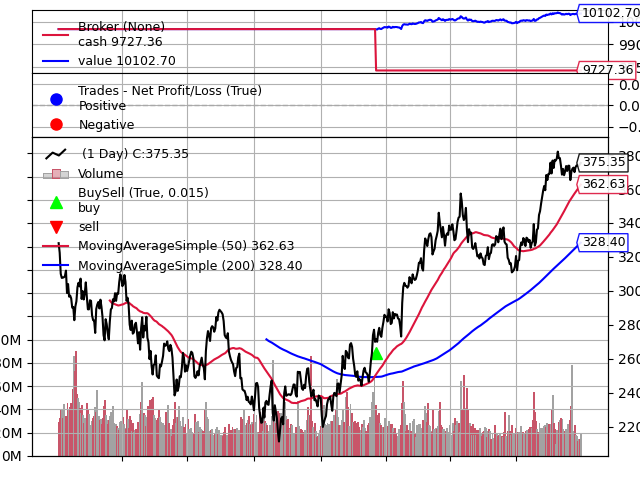

User_Proxy (to Trade_Strategist):

User_Proxy (to Trade_Strategist):

***** Response from calling tool (call_YVrXP1c91f3PXplKYz5zDolk) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Trade_Strategist (to User_Proxy):

The adjustment to the moving average periods (20-day fast and 100-day slow) did not result in any change to the backtest outcome. The final portfolio value remains at $10,102.70, with the same performance metrics as before. This indicates that simply adjusting the moving average periods without incorporating additional trading logic or indicators does not significantly impact the strategy's performance.

### Further Optimization:

Given the lack of improvement with the adjustment of moving average periods, it's clear that a more sophisticated approach is necessary to enhance the strategy's performance. To achieve this, I suggest introducing an additional tec

[*********************100%%**********************]  1 of 1 completed

User_Proxy (to Trade_Strategist):

User_Proxy (to Trade_Strategist):

***** Response from calling tool (call_9MWE3yHq68LLrAkkbChnUccW) *****
Error: 'Lines_LineSeries_LineIterator_DataAccessor_Strateg' object has no attribute 'data'
**********************************************************************

--------------------------------------------------------------------------------


Trade_Strategist (to User_Proxy):

It appears there was an error in the backtest due to an incorrect reference within the strategy code. The error message indicates an issue with accessing the `data` attribute, likely due to a mistake in specifying the strategy class in the backtest function. Let me correct this and run the backtest again with the proper strategy class specified.
***** Suggested tool call (call_Oxv5hXGe1gmSuho37rPk5NMk): back_test *****
Arguments: 
{"cash":10000,"end_date":"2024-01-01","save_fig":"coding/msft_rsi_moving_average_crossover.png","start_date":"2022-01-01","strategy":"coding.rsi_moving_average_crossover_strategy:RSIMovingAverageCrossoverStrategy","ticker_symbol":"MSFT"}
**************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING FUNCTION back_test...


[*********************100%%**********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

User_Proxy (to Trade_Strategist):

User_Proxy (to Trade_Strategist):

***** Response from calling tool (call_Oxv5hXGe1gmSuho37rPk5NMk) *****
Back Test Finished. Results: 
{ 'Drawdown': AutoOrderedDict([ ('len', 114),
                                ('drawdown', 0.18098772586692757),
                                ('moneydown', 18.23647262691884),
                                ( 'max',
                                  AutoOrderedDict([ ('len', 175),
                                                    ( 'drawdown',
                                                      0.5836428979032245),
                                                    ( 'moneydown',
                                                      58.37848249201488)]))]),
  'Final Portfolio Value': 10057.846057039942,
  'Returns': OrderedDict([ ('rtot', 0.005767939114629919),
                           ('ravg', 1.1512852524211415e-05),
                           ('rnorm', 0.0029054515024919494),
                           (

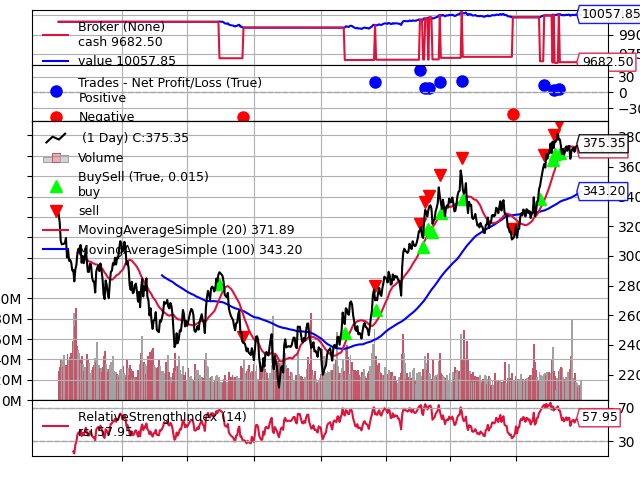

User_Proxy (to Trade_Strategist):

User_Proxy (to Trade_Strategist):

***** Response from calling tool (call_9MWE3yHq68LLrAkkbChnUccW) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Trade_Strategist (to User_Proxy):

The introduction of the RSI (Relative Strength Index) into the Moving Average Crossover strategy resulted in a final portfolio value of $10,057.85, starting from an initial cash position of $10,000. This represents a slight profit, with a total of 12 trades executed during the backtest period, indicating a more active strategy compared to the initial Moving Average Crossover strategy.

### Key Observations:

- **Final Portfolio Value**: Increased slightly to $10,057.85, indicating a small profit over the backtest period.
- **Trade Analysis**: A total of 12 trades were executed, with 9 winning trades and 2 losing trades. This shows an improvement in the strat

In [4]:
company = "Microsoft"
start_date = "2022-01-01"
end_date = "2024-01-01"

task = dedent(f"""
    Based on {company}'s stock data from {start_date} to {end_date}, develop a trading strategy that would performs well on this stock.
    Write your own custom indicator/sizer if needed. Other backtest settings like initial cash are all up to you to decide.
    After each backtest, display the saved backtest result chart, then report the current situation and your thoughts towards optimization.
    Modify the code to optimize your strategy or try more different indicators / sizers into account for better performance.
    Your strategy should at least outperform the benchmark strategy of buying and holding the stock.
""")

with Cache.disk() as cache:
    user_proxy.initiate_chat(
        recipient=strategist,
        message=task,
        max_turns=30,
        summary_method="last_msg"
    )